<div style="background-color: #ffffff; color: #333; padding: 15px; border: 1px solid #ddd; border-radius: 8px;">
    <a class="anchor" id="1st-bullet"></a>
    <h2 style="color: #795548; font-weight: bold; text-align: center;">Group Project - Feature Selection</h2>
    <h3 style="color: #a1887f; text-align: center;">Data Mining 2024/2025</h3>
</div>

<div style="text-align: center;">
    <strong>Group 14</strong>
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Francisco Santos</td>
            <td style="border: 1px solid white; padding: 8px;">20240562</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Nuno Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20240560</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### **Structure**
1. [Change](#add)
2. [Change](#add)

In [1]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
from math import ceil

from scipy import stats

# Encoder 
from sklearn.preprocessing import OrdinalEncoder

# Standard scaler
from sklearn.preprocessing import StandardScaler

import warnings

In [2]:
df = pd.read_csv('df2.csv') #, index_col='customer_id'

In [7]:
df.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,total_amount_spent,customer_city,total_orders,days_since_last_order,vendor_loyalty_score,cuisine_variety,available_cuisines_city,relative_cuisine_variety,average_spending,order_frequency
0,-1.336914,-0.405124,-0.101535,-0.460631,-1.179582,-2.746186,-0.419982,-0.424012,-0.271954,-0.125188,...,-0.207887,-1.060623,-0.471133,-2.746186,-0.076298,-0.870670,1.151593,-1.080237,0.528089,22.754035
1,-1.478066,-0.405124,-0.531991,-0.209876,-1.179582,-2.746186,0.676943,-0.153769,-0.271954,-0.125188,...,-0.415895,1.338483,-0.471133,-2.746186,-0.076298,-0.195411,-1.281334,0.378789,-0.087778,22.754035
2,1.486128,-0.765813,-0.531991,-0.209876,-1.179582,-2.746186,0.367203,-0.424012,-0.271954,-0.125188,...,-0.631216,-0.260921,-0.471133,-2.746186,1.472881,-0.870670,0.108910,-0.947598,-0.725299,22.754035
3,-0.207697,-0.405124,-0.388506,-0.460631,-1.179582,-2.702571,-0.419982,0.155382,-0.271954,-0.125188,...,-0.150238,-0.260921,-0.471133,-2.702571,-0.076298,-0.195411,0.108910,-0.284404,0.698774,10.938078
4,-1.054610,-0.405124,-0.101535,-0.711387,-1.179582,-2.702571,0.826679,1.304442,-0.271954,-0.125188,...,0.363436,-0.260921,-0.471133,-2.702571,-0.076298,-0.195411,0.108910,-0.284404,2.219652,10.938078


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# select columns representing orders per hour (HR_0 to HR_23)
orders_per_hour = df.loc[:, 'HR_0':'HR_23']

# calculate the total number of orders for different times of the day
dawn = sum(df.loc[:, 'HR_0':'HR_6'].sum())  # Sum of orders from 12 AM to 6 AM
morning = sum(df.loc[:, 'HR_7':'HR_12'].sum())  # Sum of orders from 7 AM to 12 PM
afternoon = sum(df.loc[:, 'HR_13':'HR_18'].sum())  # Sum of orders from 1 PM to 6 PM
night = sum(df.loc[:, 'HR_19':'HR_23'].sum())  # Sum of orders from 7 PM to 11 PM

# organize total orders for each time of the day in a list
orders_per_moment_of_day = [dawn, morning, afternoon, night]

# select columns representing orders per day of the week (DOW_0 to DOW_6)
orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']

# calculate the sum of orders for each day of the week
orders_per_dow_sum = orders_per_dow.sum()

# select columns representing the amount spent per cuisine type (CUI_American to CUI_Thai)
amount_spent_per_cuisine = df.loc[:, 'CUI_American':'CUI_Thai']

# calculate the sum of the amount spent for each cuisine type
amount_spent_per_cuisine_sum = amount_spent_per_cuisine.sum()

In [10]:
non_metric = df.select_dtypes(include=['object'])
# identify the metric features without the orders_per_dow, amount_spent_per_cuisine and orders_per_hour
metric_features = df.columns.drop(non_metric.columns).drop(orders_per_dow).drop(amount_spent_per_cuisine).drop(orders_per_hour).to_list()

print(metric_features)

['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'total_amount_spent', 'customer_city', 'total_orders', 'days_since_last_order', 'vendor_loyalty_score', 'cuisine_variety', 'available_cuisines_city', 'relative_cuisine_variety', 'average_spending', 'order_frequency']


## Encoding Categorical features

In [51]:
# Encode categorical data
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-100)
encoder.fit(non_metric)
non_metric_encoded = encoder.transform(non_metric)

# Convert encoded data into a DataFrame
df_categorical_encoded = pd.DataFrame(non_metric_encoded, columns=non_metric.columns, index=non_metric.index)

# Combine encoded non-metric and metric data
df = pd.concat([df_categorical_encoded, df[metric_features]], axis=1)

df.head()

,customer_region,last_promo,payment_method,customer_city,customer_age,vendor_count,product_count,is_chain,first_order,last_order,total_amount_spent,total_orders
customer_id,,,,,,,,,,,,
1b8f824d5e,1.0,1.0,2.0,0.0,18.0,2,5,1,0.0,1,28.88,2
5d272b9dcb,8.0,2.0,2.0,2.0,17.0,2,2,2,0.0,1,19.21,2
f6d1b2ba63,5.0,2.0,1.0,1.0,38.0,1,2,2,0.0,1,9.20,2
180c632ed8,5.0,1.0,2.0,1.0,26.0,2,3,1,0.0,2,31.56,2
4eb37a6705,5.0,0.0,2.0,1.0,20.0,2,5,0,0.0,2,55.44,2


## Scaling the Data

In [52]:
# Scale the train set
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

df.head()

,customer_region,last_promo,payment_method,customer_city,customer_age,vendor_count,product_count,is_chain,first_order,last_order,total_amount_spent,total_orders
customer_id,,,,,,,,,,,,
1b8f824d5e,-1.266387,0.102582,1.820275,-1.212103,-1.336914,-0.405124,-0.101535,-0.460631,-1.179582,-2.746186,-0.207887,-0.471133
5d272b9dcb,1.233282,1.014735,1.820275,1.227863,-1.478066,-0.405124,-0.531991,-0.209876,-1.179582,-2.746186,-0.415895,-0.471133
f6d1b2ba63,0.161995,1.014735,0.558859,0.007880,1.486128,-0.765813,-0.531991,-0.209876,-1.179582,-2.746186,-0.631216,-0.471133
180c632ed8,0.161995,0.102582,1.820275,0.007880,-0.207697,-0.405124,-0.388506,-0.460631,-1.179582,-2.702571,-0.150238,-0.471133
4eb37a6705,0.161995,-0.809570,1.820275,0.007880,-1.054610,-0.405124,-0.101535,-0.711387,-1.179582,-2.702571,0.363436,-0.471133


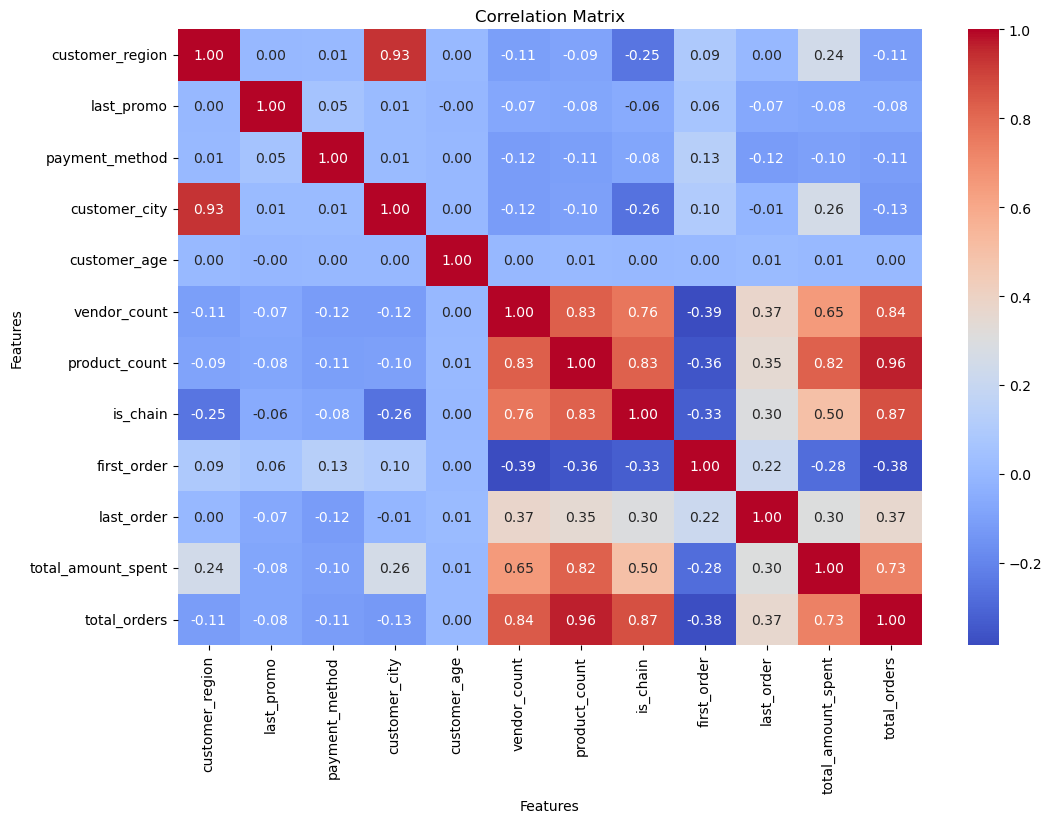

In [53]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adding titles and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

**Keep**: customer_age, first_order, last_order, customer_city, total_amount_spent, total_orders, payment_method, last_promo

**Suggestions**: take information of the CUI_(...) features, such as diversity and tastes; HR_(...) can indicate the customer usage of the delivery service (is it for meals, groceries) - more feature engineering?

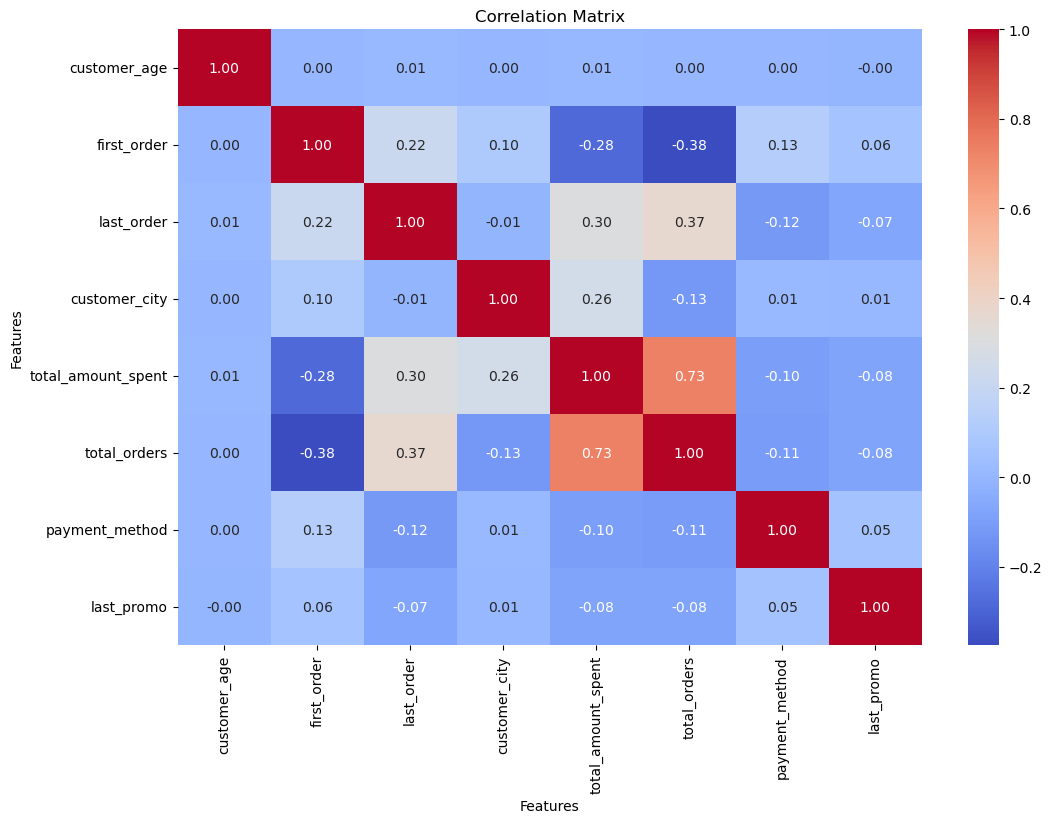

In [56]:
columns_to_keep = ['customer_age', 'first_order', 'last_order', 'customer_city', 'total_amount_spent', 'total_orders', 'payment_method', 'last_promo']
df_keep = df[columns_to_keep]
correlation_matrix = df_keep.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adding titles and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

## Perspectives

Prefences - 

Behavioral - total_amount_spent, total_orders, first_order, las_order